<a href="https://colab.research.google.com/github/ayedsalman/Tensor-Flow/blob/master/neural_network_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
print(keras.__version__)


2.3.0-tf


In [0]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into testing and training

4423680/4422102 [==============================] - 0s 0us/step


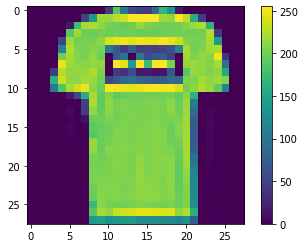

In [0]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='sigmoid'),  # hidden layer (3)  # hidden layer (2)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (3)
   # keras.layers.Dense(32, activation='relu'),  # hidden layer (4)
    keras.layers.Dense(10, activation='softmax') # output layer (5)
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=5)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2261 - accuracy: 0.9147
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2163 - accuracy: 0.9185
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2090 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2021 - accuracy: 0.9227
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1940 - accuracy: 0.9265


In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

In [0]:
predictions = model.predict(test_images)

In [0]:
predictions[1]
np.argmax(predictions[1])
test_labels[1]

2

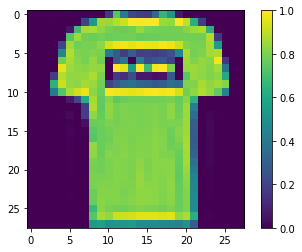

In [0]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 543


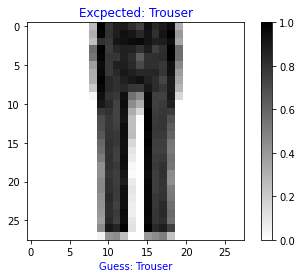

In [0]:
COLOR = 'blue'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)